In [ ]:
pip install Riskfolio-Lib

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

In [ ]:
stocklist=['INFY','TCS','WIPRO','TECHM','HCLTECH','LTIM','PERSISTENT','COFORGE','MPHASIS','LT']
tickers=np.array([i + '.NS' for i in stocklist])
tickers

array(['INFY.NS', 'TCS.NS', 'WIPRO.NS', 'TECHM.NS', 'HCLTECH.NS',
       'LTIM.NS', 'PERSISTENT.NS', 'COFORGE.NS', 'MPHASIS.NS', 'LT.NS'],
      dtype='<U13')

In [ ]:
from yahoofinancials import YahooFinancials

In [ ]:
pip install yahoofinancials

In [ ]:
yahoo_financials = YahooFinancials(tickers)

In [ ]:
test = yahoo_financials.get_historical_price_data(start_date='2019-07-1',
                                                  end_date='2023-06-30',
                                                  time_interval='daily')

In [ ]:
prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['close'] for x in test[a]['prices']} for a in tickers})

In [ ]:
prices_df.head()

,INFY.NS,TCS.NS,WIPRO.NS,TECHM.NS,HCLTECH.NS,LTIM.NS,PERSISTENT.NS,COFORGE.NS,MPHASIS.NS,LT.NS
2019-07-01,73129.9988%,223955.0049%,28200.0000%,70465.0024%,52454.9988%,184125.0000%,61615.0024%,135069.9951%,99070.0012%,155665.0024%
2019-07-02,74000.0000%,225210.0098%,28425.0000%,71165.0024%,53000.0000%,176469.9951%,61170.0012%,134584.9976%,97265.0024%,156384.9976%
2019-07-03,73129.9988%,223764.9902%,28285.0006%,70109.9976%,52559.9976%,173519.9951%,61579.9988%,133365.0024%,98895.0012%,157805.0049%
2019-07-04,73379.9988%,224264.9902%,28385.0006%,70059.9976%,52037.5000%,165580.0049%,62059.9976%,133815.0024%,99440.0024%,157169.9951%
2019-07-05,71800.0000%,216310.0098%,27185.0006%,68109.9976%,50820.0012%,166569.9951%,62720.0012%,132350.0000%,98195.0012%,155834.9976%


In [ ]:
# Calculating returns
Y = prices_df.pct_change().dropna()

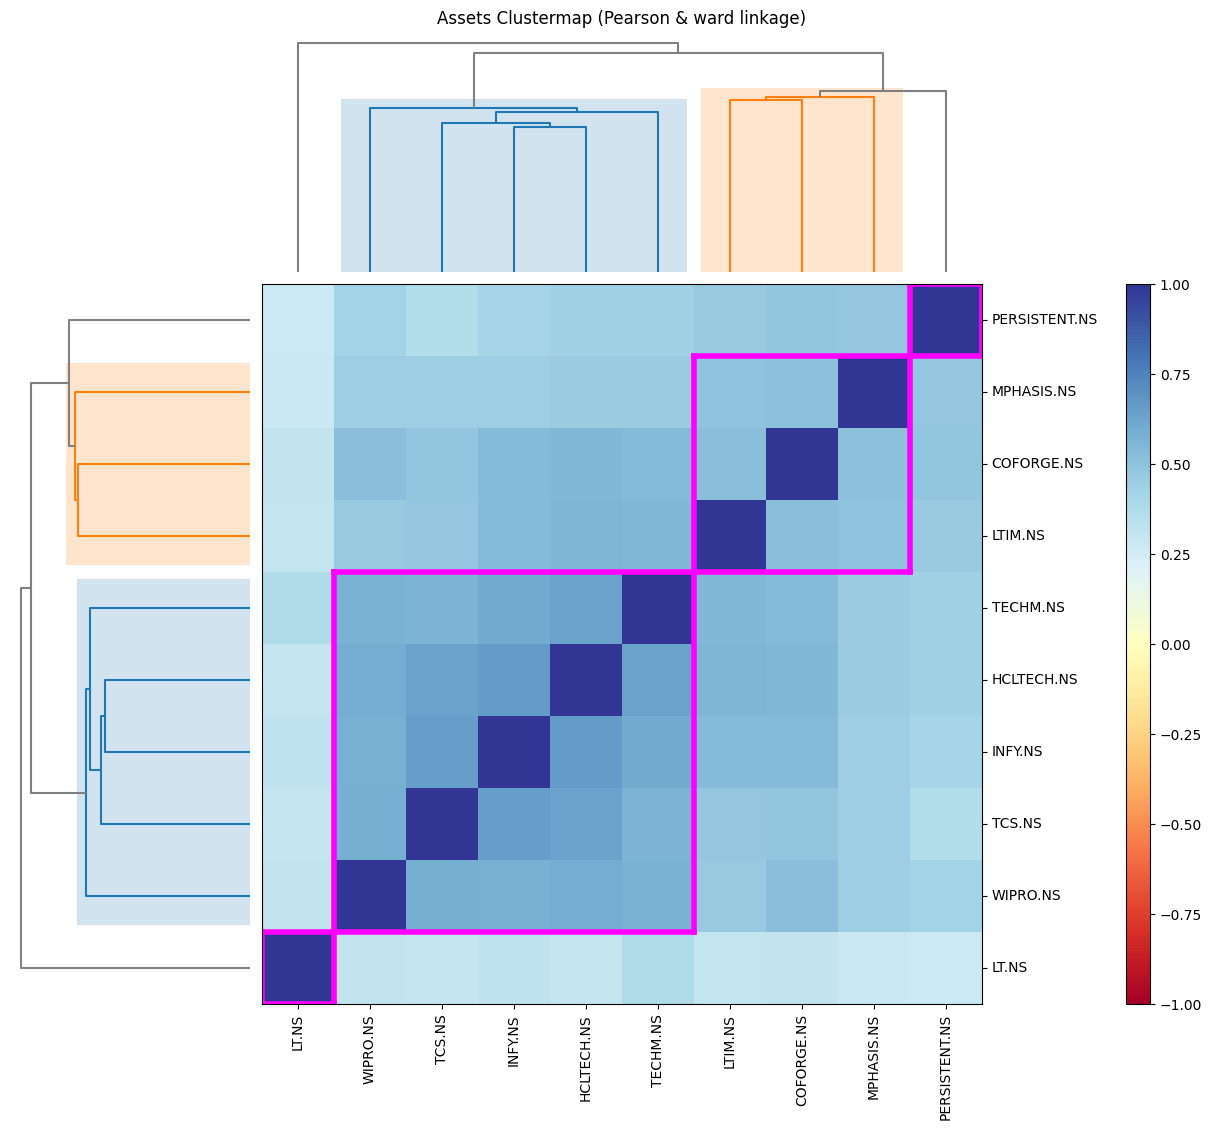

In [ ]:
import riskfolio as rp
ax = rp.plot_clusters(returns=Y,
                       codependence='pearson',
                       linkage='ward',
                       k=None,
                       max_k=10,
                       leaf_order=True,
                       dendrogram=True,
                       #linecolor='tab:purple',
                       ax=None)

In [ ]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w)

,weights
INFY.NS,6.8923%
TCS.NS,15.9098%
WIPRO.NS,16.0197%
TECHM.NS,11.3825%
HCLTECH.NS,7.5683%
LTIM.NS,8.5443%
PERSISTENT.NS,5.8740%
COFORGE.NS,5.6071%
MPHASIS.NS,6.4198%
LT.NS,15.7820%


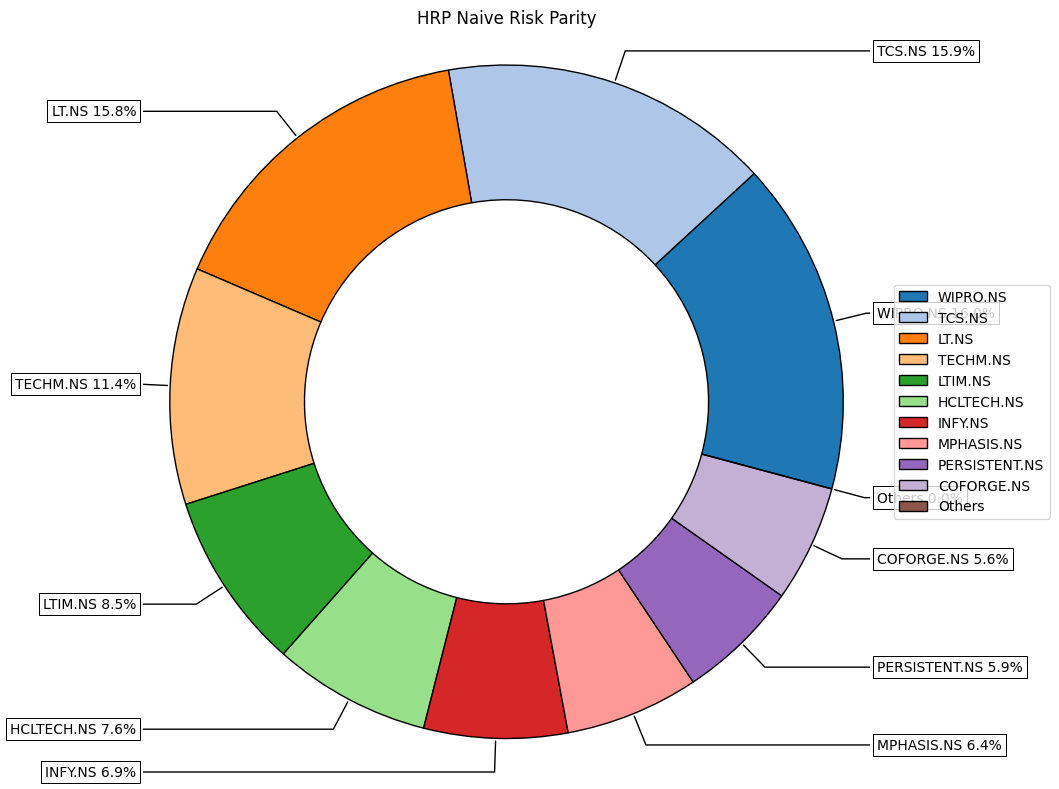

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

In [ ]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HERC' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w2 = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w2)

,weights
INFY.NS,0.9337%
TCS.NS,1.2997%
WIPRO.NS,0.9884%
TECHM.NS,0.8310%
HCLTECH.NS,1.0253%
LTIM.NS,0.6238%
PERSISTENT.NS,12.0575%
COFORGE.NS,0.3913%
MPHASIS.NS,2.8676%
LT.NS,78.9818%


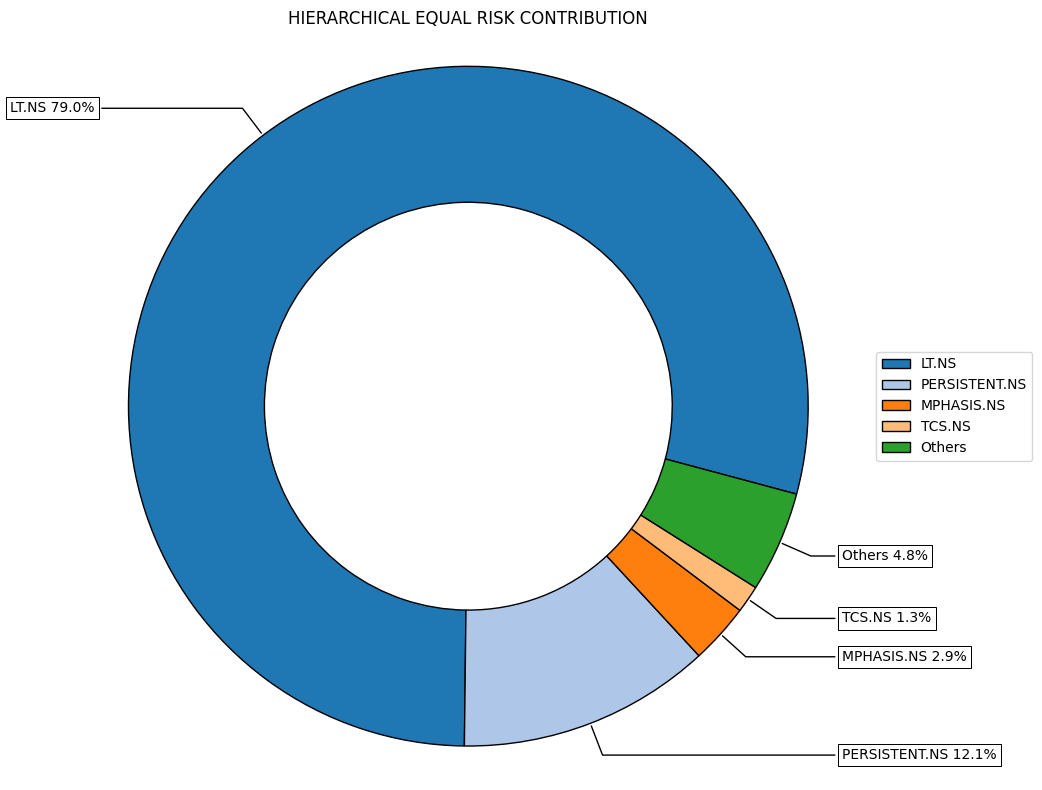

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w2,
                 title='HIERARCHICAL EQUAL RISK CONTRIBUTION',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)